In [22]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
plt.style.use

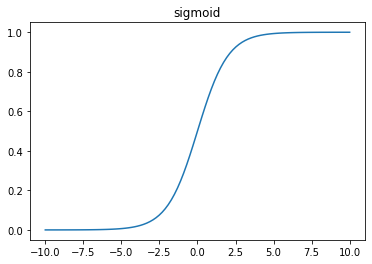

In [ ]:
# draw f(x)
x = np.linspace(-10,10,100)
f =  1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.title("sigmoid")
plt.show()

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

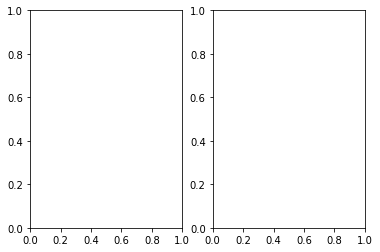

In [ ]:
fig, axes = plt.subplots(1,2)

Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

In [2]:
import pandas as pd
import datetime
dt = pd.read_csv("/content/fb.csv")
dt.head(5)

,date,high,low,open,close,volume
0,2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900
1,2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600
2,2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900
3,2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500
4,2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700


In [13]:
dt1 = dt.assign(year = pd.DatetimeIndex(dt['date']).year)
dt1.head(5)

,date,high,low,open,close,volume,year
0,2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,2018
1,2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,2018
2,2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,2018
3,2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,2018
4,2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,2018


In [16]:
dt1 = dt1.assign(day = pd.DatetimeIndex(dt['date']).week)
dt1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


,date,high,low,open,close,volume,year,day
0,2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,2018,1
1,2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,2018,1
2,2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,2018,1
3,2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,2018,1
4,2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,2018,2


In [20]:
dt1 = dt1.groupby(dt1.day).agg({'high': max, 'low': min})
dt1.head(5)


AttributeError: ignored

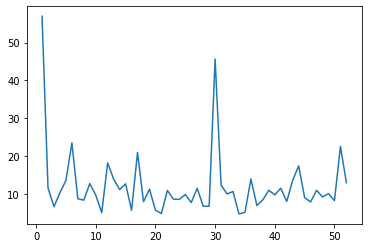

In [23]:
dt1 = dt1.assign(change = dt1.high - dt1.low)
plt.plot(dt1.change)

Draw scatter plot (kind=‘scatter’) to show the relationship between the volumn and diference between high price and low price.

In [ ]:
dt = dt.assign(change = dt.high - dt.low)
print(dt.head(5))

         date        high         low  ...       close    volume    change
0  2018-01-02  181.580002  177.550003  ...  181.419998  18151900  4.029999
1  2018-01-03  184.779999  181.330002  ...  184.669998  16886600  3.449997
2  2018-01-04  186.210007  184.100006  ...  184.330002  13880900  2.110001
3  2018-01-05  186.899994  184.929993  ...  186.850006  13574500  1.970001
4  2018-01-08  188.899994  186.330002  ...  188.279999  17994700  2.569992

[5 rows x 7 columns]


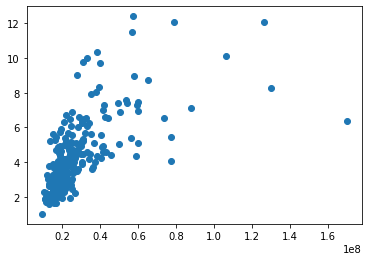

In [ ]:
plt.scatter(dt.volume, dt.change)

In [30]:
dt2 = pd.read_csv("/content/earthquakes.csv")
dt2.head(3)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.19,28,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,NaN,ci,20.0,"9km NE of Aguanga, CA",0.29,26,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,NaN,ci,111.0,"8km NE of Aguanga, CA",0.22,192,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...


Using the earthquake data, create box plots for the magnitudes of each magTypeused in Indonesia.

In [31]:
dt2 = dt2[(dt2.place.str.contains(r'Indonesia'))]

dt2.head(5)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz,updated,url
9,NaN,NaN,1000hbtn,https://earthquake.usgs.gov/fdsnws/event/1/que...,3.191,NaN,37.0,",us1000hbtn,",4.7,mb,NaN,us,NaN,"219km SSE of Saparua, Indonesia",0.78,340,",us,",reviewed,1539472814760,"M 4.7 - 219km SSE of Saparua, Indonesia",0,earthquake,",geoserve,origin,phase-data,",540.0,1539473712040,https://earthquake.usgs.gov/earthquakes/eventp...
13,NaN,NaN,1000hbti,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.193,NaN,157.0,",us1000hbti,",4.5,mb,NaN,us,NaN,"120km SSW of Banda Aceh, Indonesia",0.69,312,",us,",reviewed,1539470898340,"M 4.5 - 120km SSW of Banda Aceh, Indonesia",0,earthquake,",geoserve,origin,phase-data,",360.0,1539493516040,https://earthquake.usgs.gov/earthquakes/eventp...
180,green,NaN,1000hbhw,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.077,NaN,23.0,",us1000hbhw,",5.2,mww,3.54,us,NaN,"25km E of Bitung, Indonesia",1.43,416,",us,",reviewed,1539405255580,"M 5.2 - 25km E of Bitung, Indonesia",0,earthquake,",geoserve,losspager,origin,phase-data,shakemap,",480.0,1539412565560,https://earthquake.usgs.gov/earthquakes/eventp...
421,NaN,NaN,1000hayw,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.812,NaN,80.0,",us1000hayw,",4.7,mb,NaN,us,NaN,"38km SSW of Nggongi Satu, Indonesia",1.07,340,",us,",reviewed,1539331098920,"M 4.7 - 38km SSW of Nggongi Satu, Indonesia",0,earthquake,",geoserve,origin,phase-data,",480.0,1539332252040,https://earthquake.usgs.gov/earthquakes/eventp...
660,NaN,NaN,1000haks,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.612,NaN,90.0,",us1000haks,",4.4,mb,NaN,us,NaN,"51km WSW of Kasiguncu, Indonesia",0.68,298,",us,",reviewed,1539258833830,"M 4.4 - 51km WSW of Kasiguncu, Indonesia",0,earthquake,",geoserve,origin,phase-data,",480.0,1539260052040,https://earthquake.usgs.gov/earthquakes/eventp...


In [32]:
B = dt2[['magType','mag']].groupby('magType')

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7faade1a8450>>

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


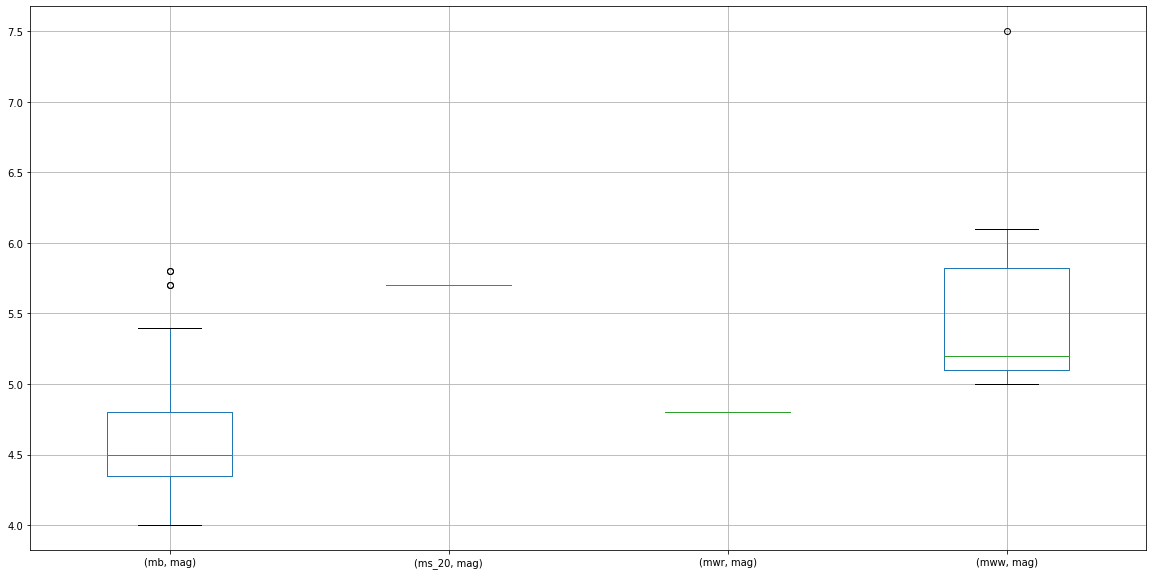

In [33]:
B.boxplot(subplots = False, figsize=(20,10))